# Lumpy Skin Disease Virus Dataset

In [1]:

# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter

from mealpy import Problem
from mealpy.evolutionary_based import GA
from mealpy.utils.space import FloatVar

import shap
import warnings
warnings.filterwarnings("ignore")

C:\Users\PMLS\anaconda3\envs\ML_envs\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the data

In [2]:
df=pd.read_csv('Lumpy skin disease data.csv')
df

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,20.250000,-16.750000,NaN,NaN,NaN,68.8,12.0,0.00,3.6,172.0,17.7,23.7,29.7,22.4,15.60,184,3,95.184093,0.000000,0
24799,20.750000,-16.750000,NaN,NaN,NaN,68.8,11.8,0.00,3.6,170.0,18.0,23.9,29.8,23.2,15.70,182,4,111.561489,0.000000,0
24800,21.250000,-16.750000,NaN,NaN,NaN,68.8,11.6,0.00,3.6,167.5,18.3,24.1,29.9,23.9,15.87,178,5,109.733287,0.000000,0
24801,21.750000,-16.750000,NaN,NaN,NaN,68.8,11.5,0.00,3.6,169.5,18.5,24.2,30.0,24.2,16.30,180,3,103.753469,0.000000,0


In [3]:
df.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [4]:
df.tail() #gives last 5 lines

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
24798,20.25,-16.75,NaN,NaN,NaN,68.8,12.0,0.0,3.6,172.0,17.7,23.7,29.7,22.4,15.60,184,3,95.184093,0.0,0
24799,20.75,-16.75,NaN,NaN,NaN,68.8,11.8,0.0,3.6,170.0,18.0,23.9,29.8,23.2,15.70,182,4,111.561489,0.0,0
24800,21.25,-16.75,NaN,NaN,NaN,68.8,11.6,0.0,3.6,167.5,18.3,24.1,29.9,23.9,15.87,178,5,109.733287,0.0,0
24801,21.75,-16.75,NaN,NaN,NaN,68.8,11.5,0.0,3.6,169.5,18.5,24.2,30.0,24.2,16.30,180,3,103.753469,0.0,0
24802,22.25,-16.75,NaN,NaN,NaN,67.5,11.4,0.0,3.7,172.1,18.7,24.4,30.1,24.5,16.67,179,3,85.084645,0.0,0


In [5]:
df.describe()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
count,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000
mean,79.221374,46.370056,59.452159,9.107777,23.978048,0.803487,26.271137,-15.794755,-11.227807,-6.681212,3.728230,8.542482,164.769302,4.416119,629.129412,170.306057,0.122526
std,43.338530,19.220555,19.423029,2.988448,11.518315,1.172915,33.630747,17.587685,17.989715,18.540915,4.952353,6.205199,19.679197,2.406231,2279.198775,1127.977653,0.327898
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,45.083150,34.750000,43.800000,6.800000,23.210000,0.000000,5.900000,-30.100000,-25.500000,-20.900000,0.400000,3.000000,152.000000,3.000000,2.513366,0.000000,0.000000
50%,80.750000,48.250000,62.300000,8.300000,31.000000,0.200000,14.700000,-19.100000,-14.200000,-9.700000,1.500000,8.020000,161.000000,4.000000,43.383823,0.000197,0.000000
75%,109.750000,61.750000,75.300000,11.100000,31.000000,1.100000,33.400000,-2.200000,1.400000,4.900000,4.800000,12.710000,176.000000,4.000000,386.124908,0.002094,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


In [6]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}") # cheking the unique values

Unique values in x: [ 90.380931  87.854975  85.279935 ... -14.25      -8.75      -8.25    ]
Unique values in y: [ 22.437184  22.986757  23.610181 ... -15.75     -16.25     -16.75    ]
Unique values in region: ['Asia' 'Europe' 'Africa' nan]
Unique values in country: ['Bangladesh' 'India' 'China' 'Israel' 'Russian Federation' 'West Bank'
 'Syrian Arab Republic' 'Georgia' 'Namibia' 'Montenegro' 'Greece' 'Angola'
 'Albania' 'Kazakhstan' 'North Macedonia' 'Serbia' 'Bulgaria' 'Burundi'
 'Saudi Arabia' 'Armenia' 'Cyprus' 'Kuwait' 'Iran  (Islamic Republic of)'
 'Azerbaijan' 'Turkey' 'Egypt' 'Iraq' 'Lebanon' 'Jordan' 'Guinea'
 'Sri Lanka' 'Viet Nam' 'Myanmar' 'Hong Kong, SAR' 'Djibouti' 'Bhutan'
 'Nepal' nan]
Unique values in reportingDate: ['10/9/2020' '20/12/2019' '25/10/2019' '17/09/2019' '25/09/2019'
 '19/09/2019' '15/09/2019' '9/9/2019' '4/9/2019' '27/08/2019' '21/08/2019'
 '14/08/2019' '7/8/2019' '9/3/2020' '22/03/2020' '5/3/2020' '18/11/2019'
 '6/11/2019' '4/12/2019' '31/10/2019' '29/10/

# Checks and handle the outliers

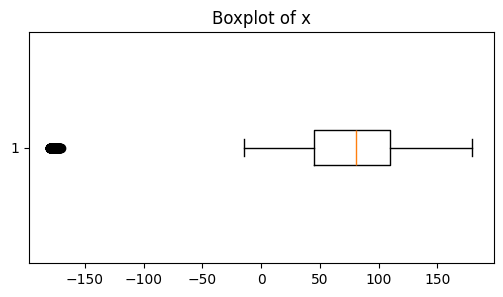

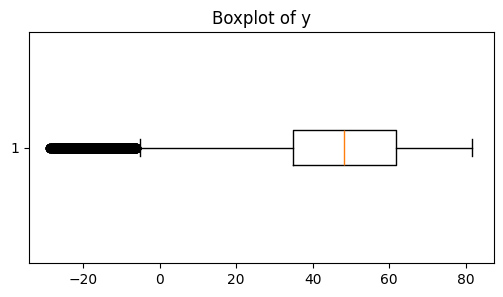

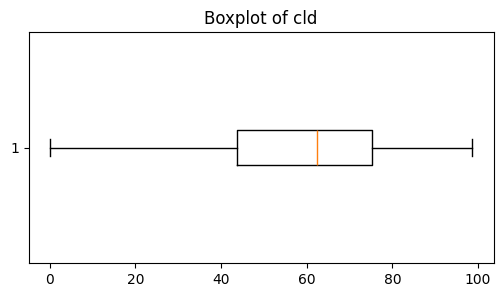

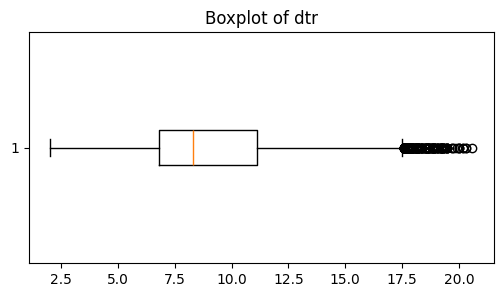

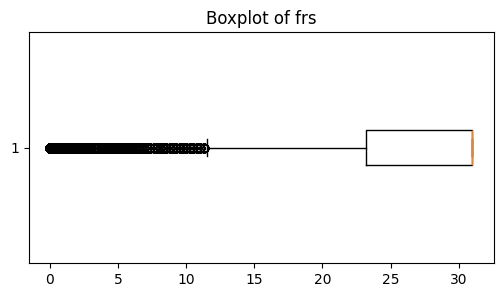

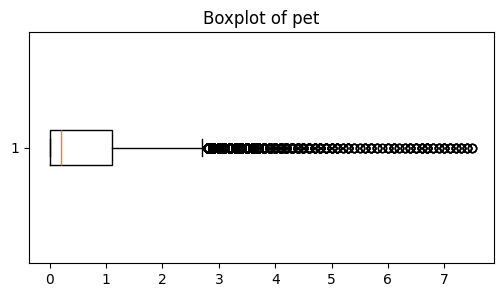

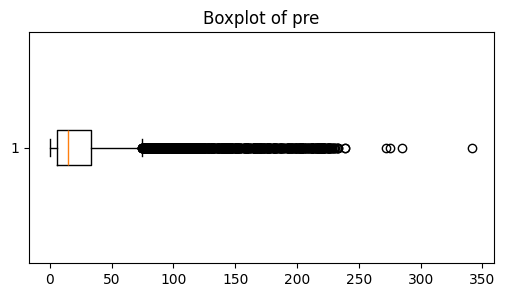

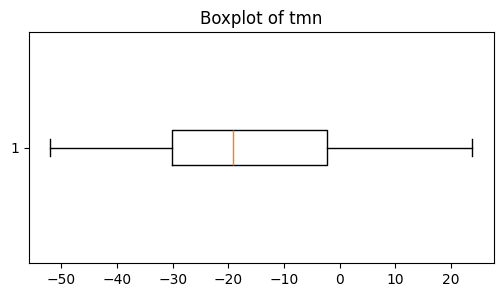

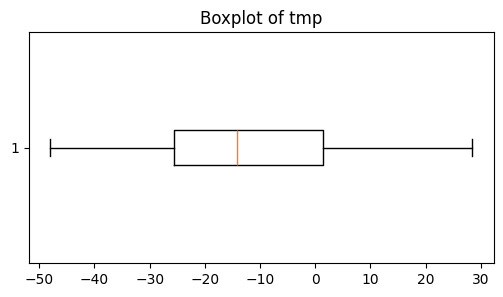

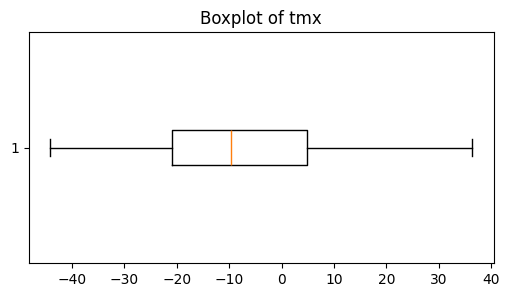

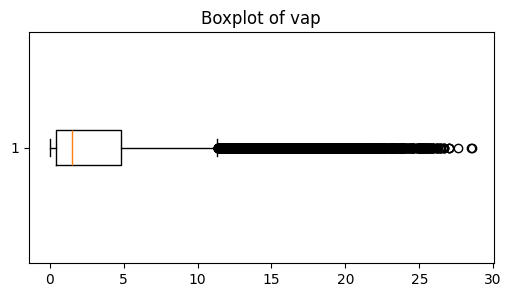

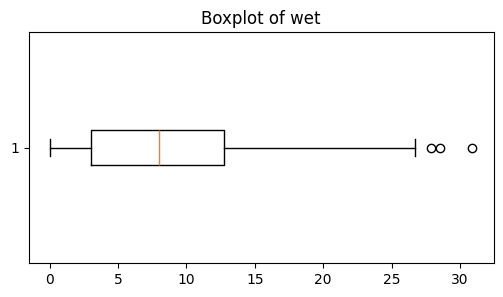

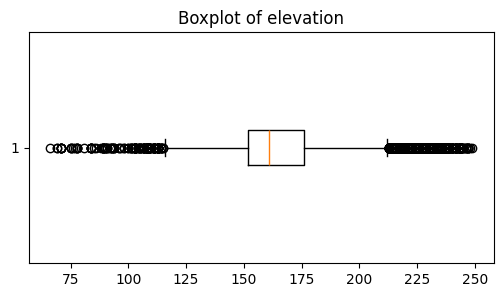

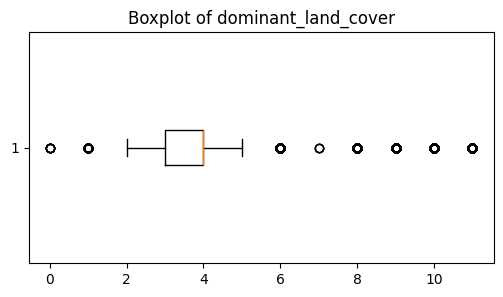

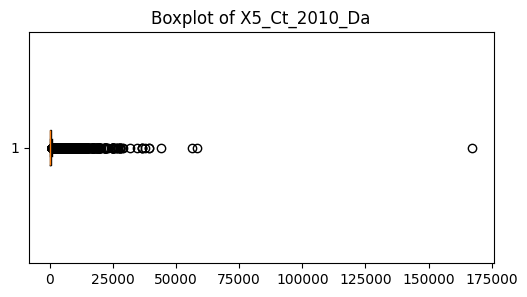

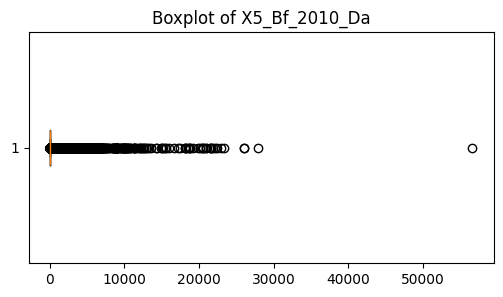

In [7]:
# Exclude target column
target_col = 'lumpy'

# Select numeric columns except target
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != target_col]
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()


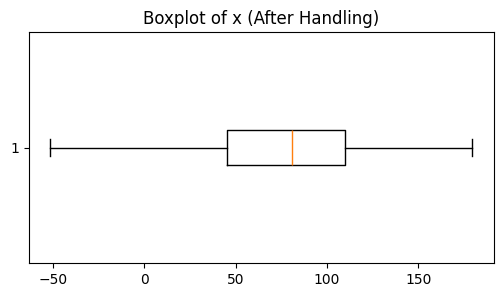

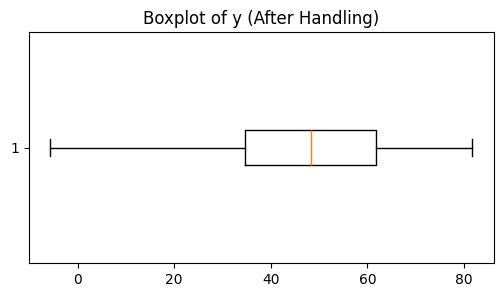

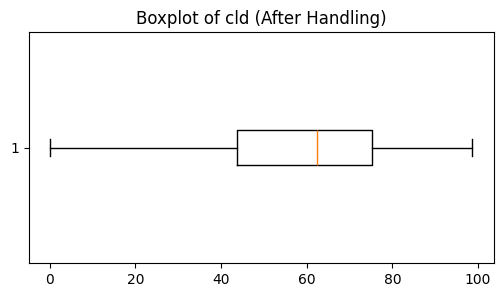

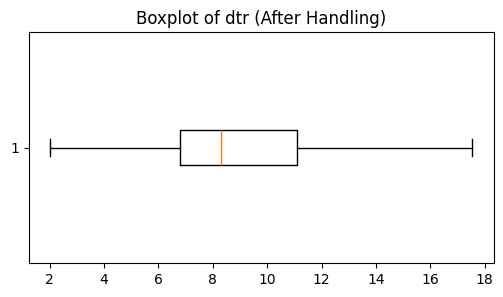

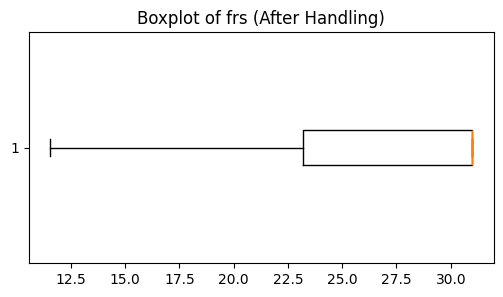

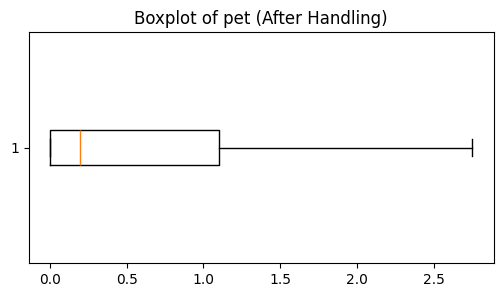

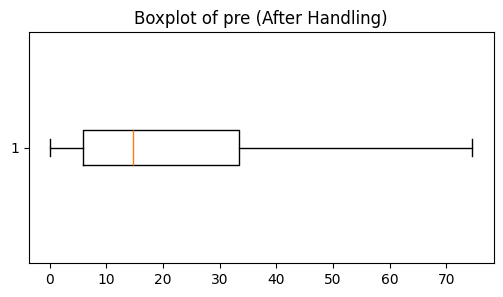

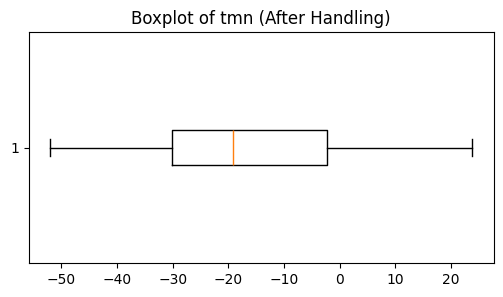

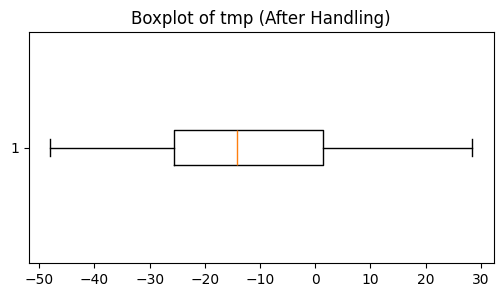

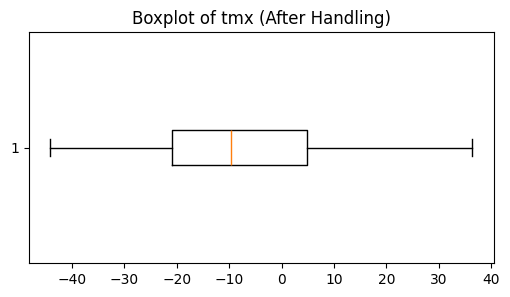

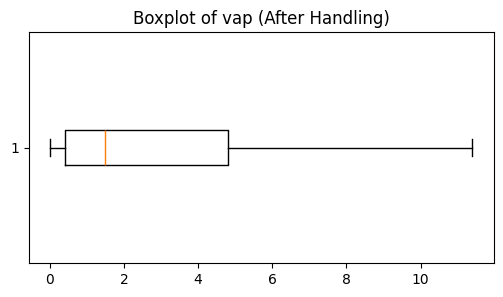

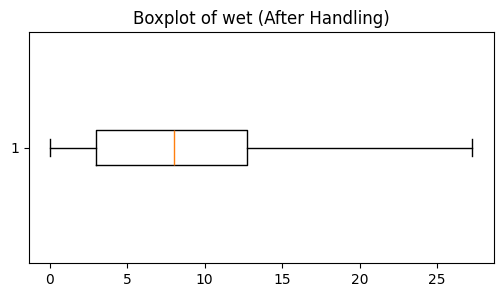

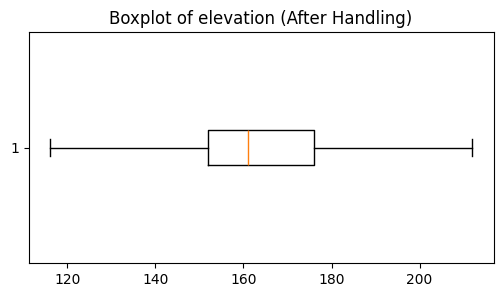

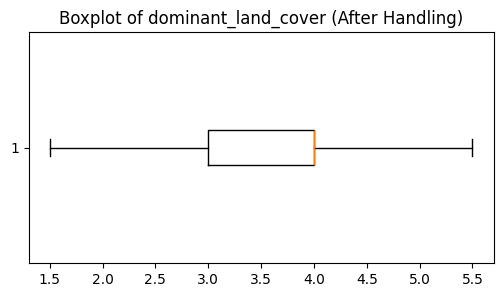

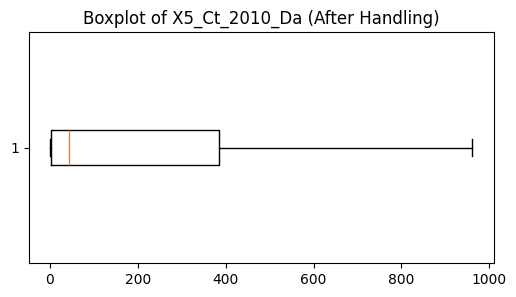

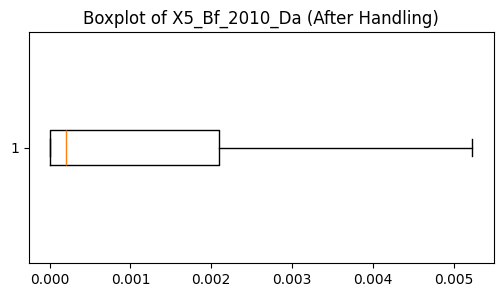

In [8]:
# Exclude target column
target_col = 'lumpy'

# Select numeric columns except target
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != target_col]

# Handle outliers (capping method)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower_bound, upper_bound)

#Visualize again after handling
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col} (After Handling)")
    plt.show()


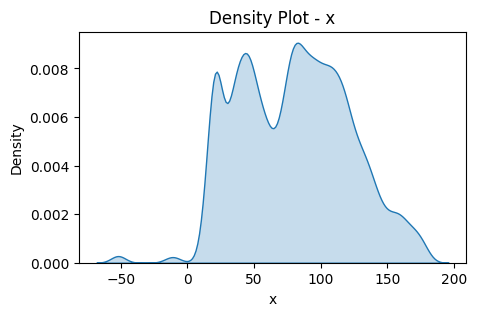

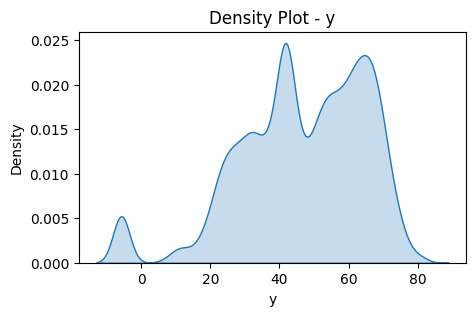

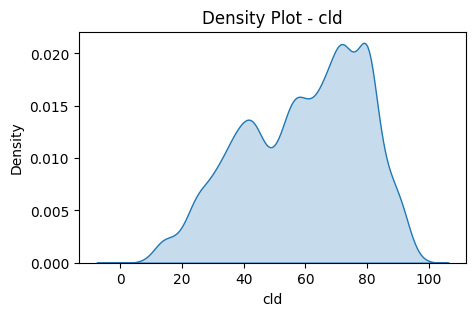

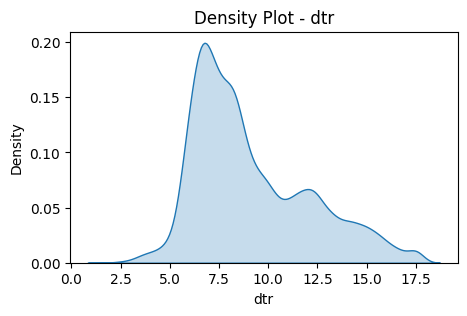

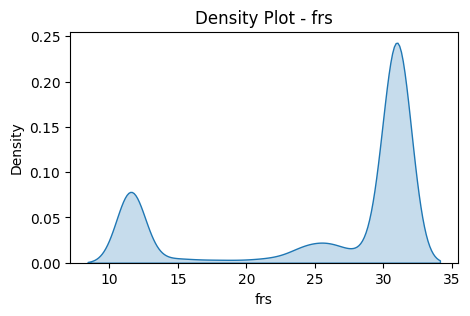

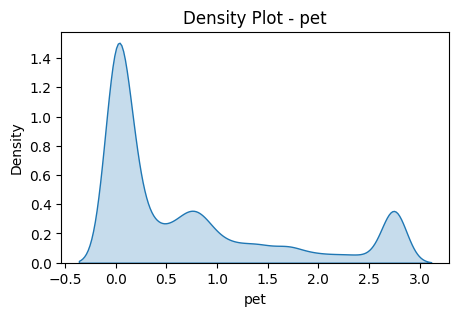

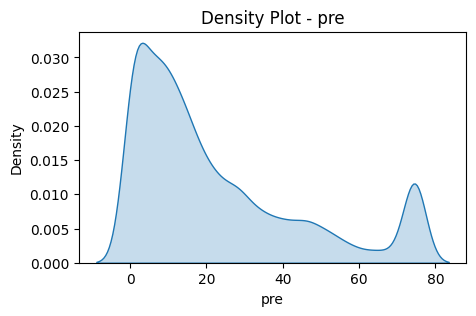

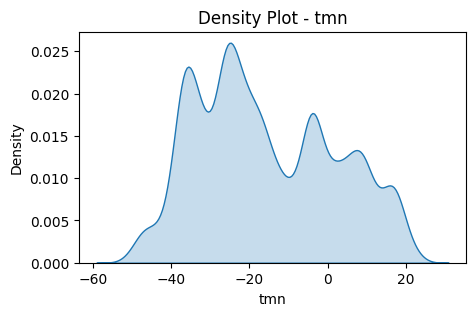

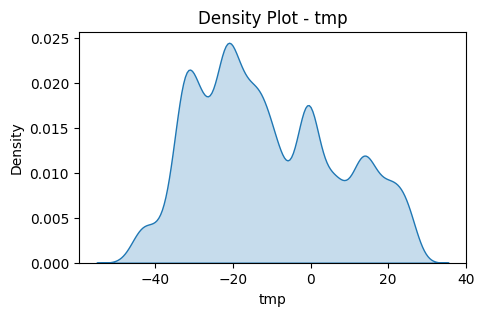

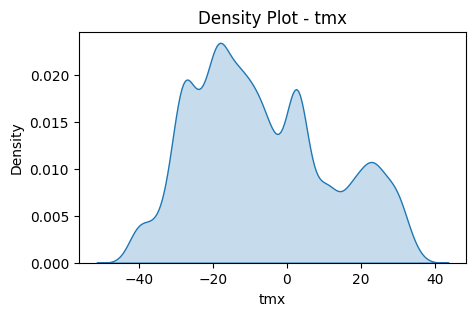

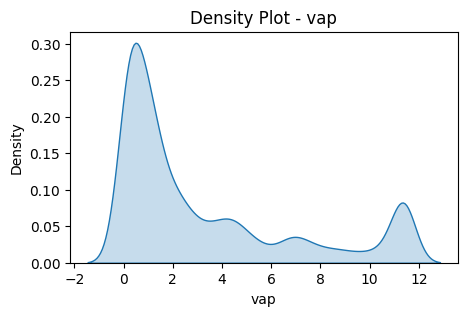

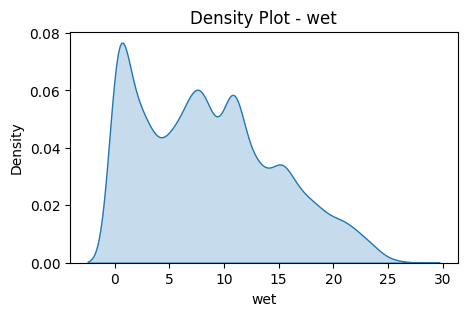

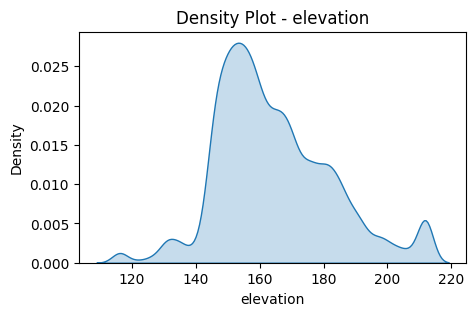

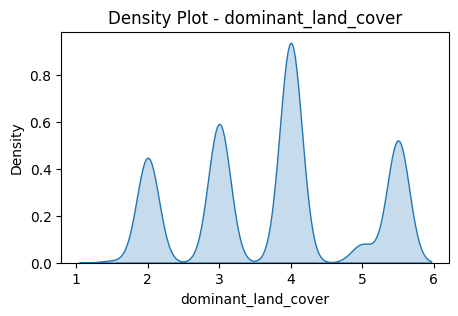

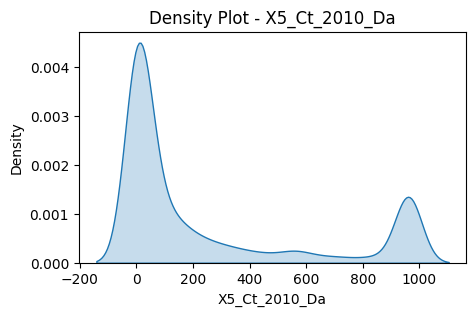

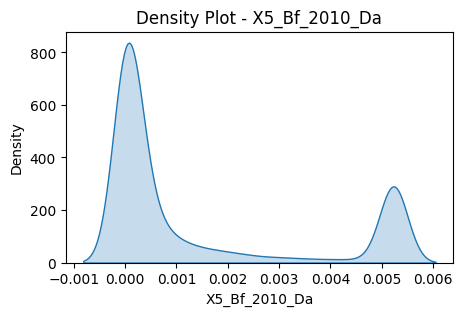

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"Density Plot - {col}")
    plt.show()


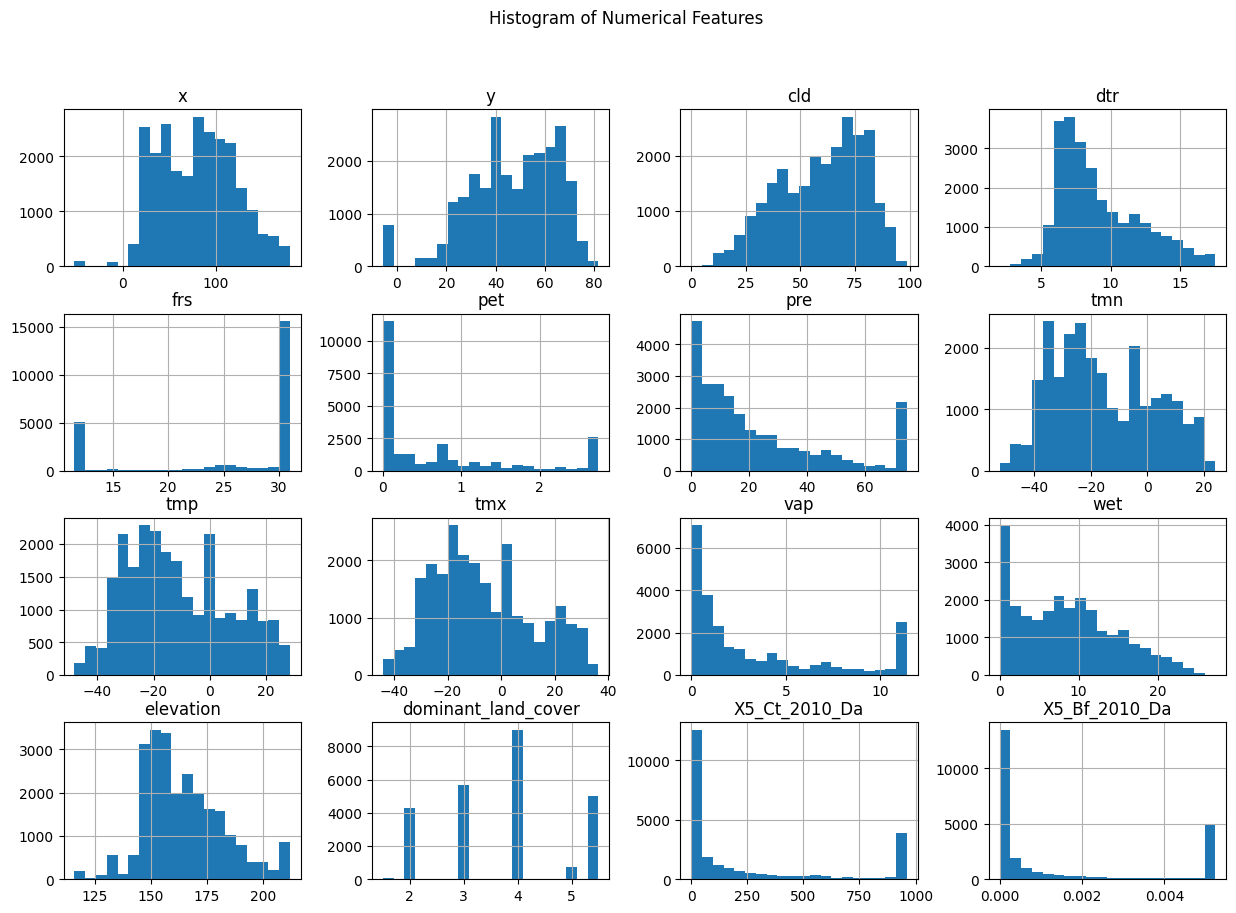

In [10]:
df[numeric_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Histogram of Numerical Features")
plt.show()

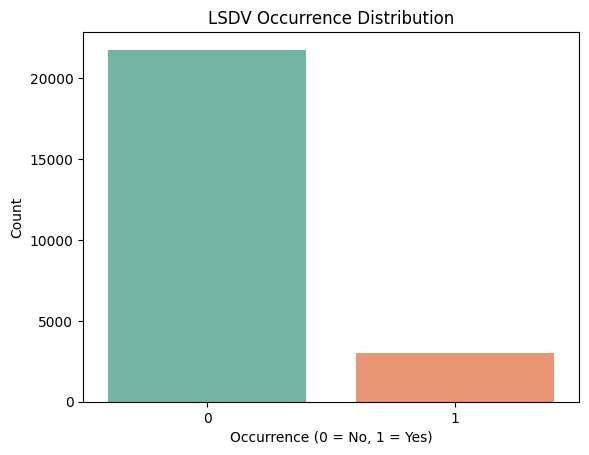

In [11]:
sns.countplot(x='lumpy', data=df, palette='Set2')
plt.title("LSDV Occurrence Distribution")
plt.xlabel("Occurrence (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


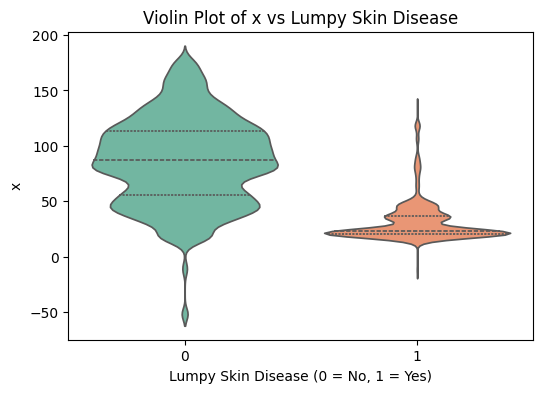

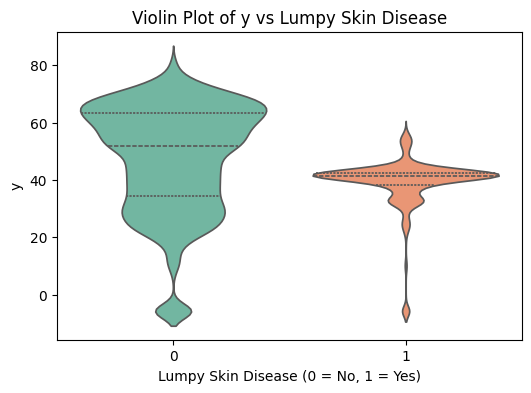

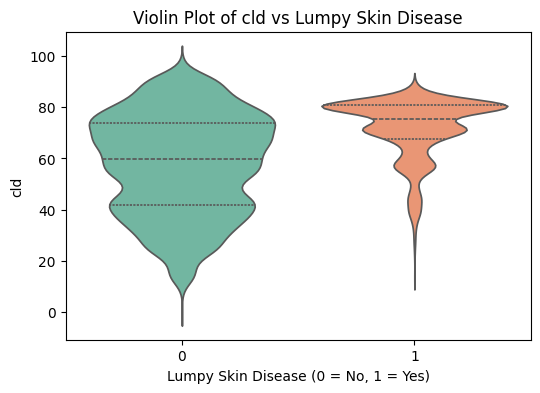

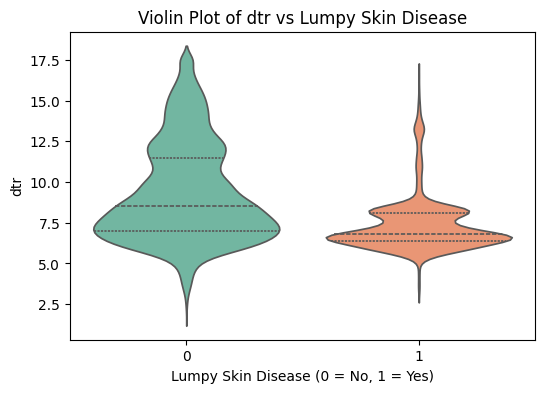

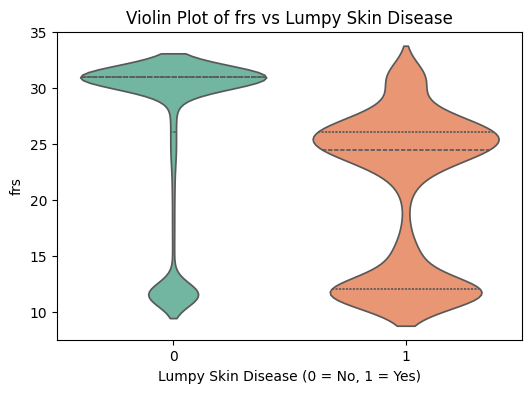

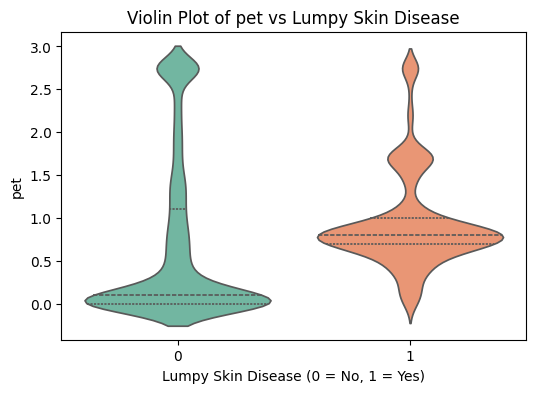

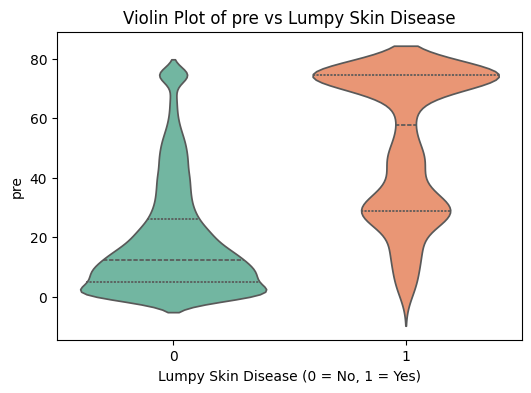

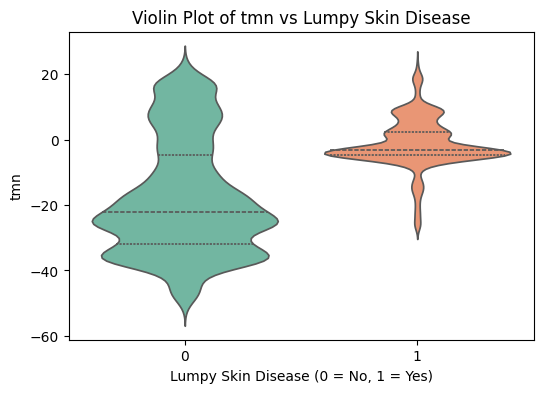

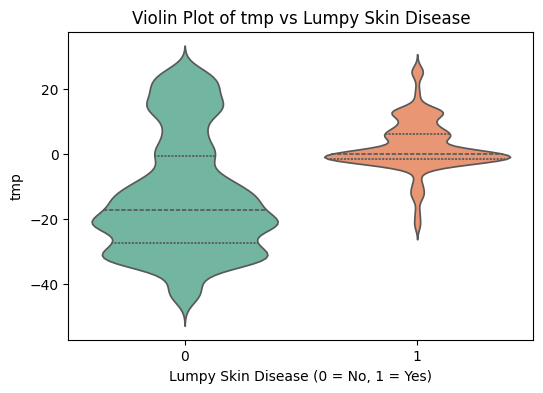

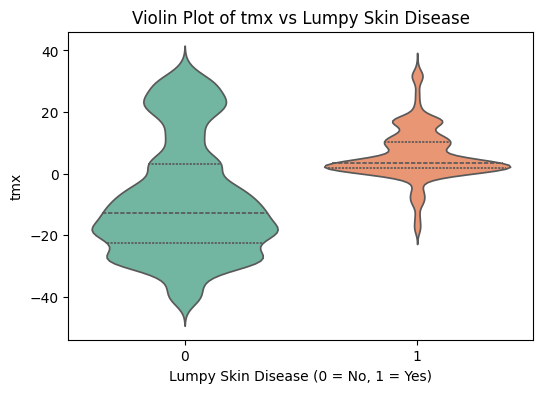

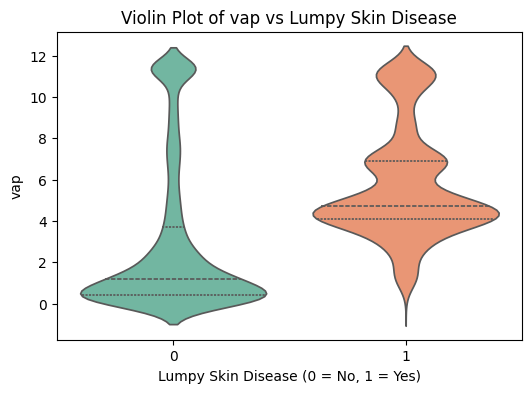

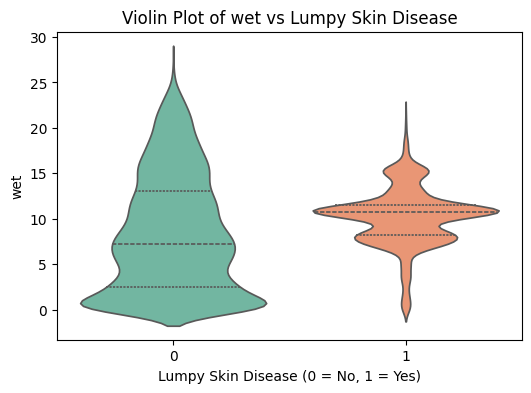

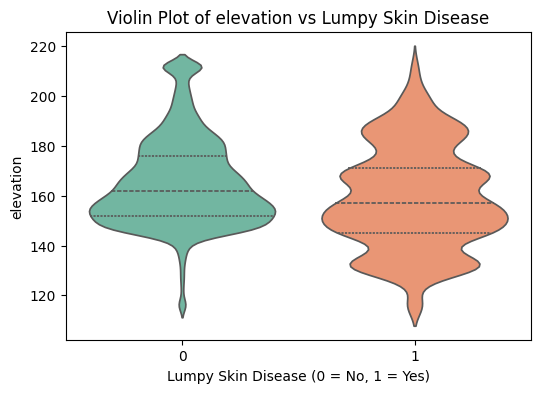

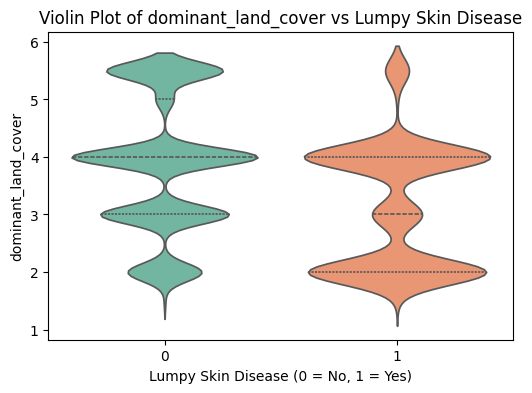

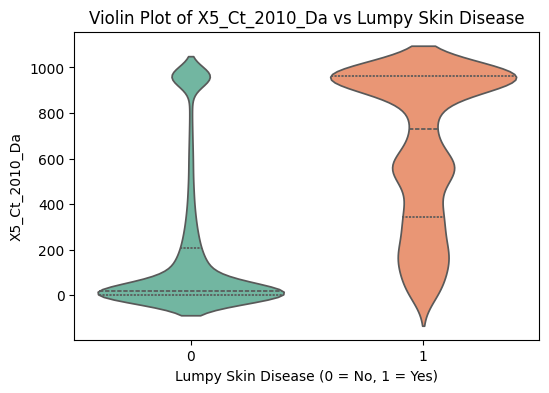

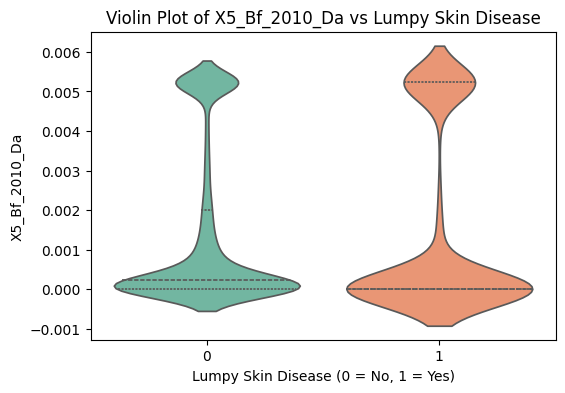

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col = "lumpy"
numeric_cols = [c for c in df.select_dtypes(include=["int64","float64"]).columns 
                if c != target_col]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(
        x=target_col,
        y=col,
        data=df,
        inner="quartile",
        palette="Set2"
    )
    plt.title(f"Violin Plot of {col} vs Lumpy Skin Disease")
    plt.xlabel("Lumpy Skin Disease (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()


# Check the counts values

In [23]:
# checks the counts values of every columns
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: x
x
79.250000    126
78.750000    124
79.750000    123
78.250000    123
80.250000    122
            ... 
22.784200      1
22.204200      1
22.688900      1
22.455000      1
47.457991      1
Name: count, Length: 2273, dtype: int64

Column: y
y
-5.7500     772
 66.2500    309
 65.7500    306
 66.7500    303
 65.2500    298
           ... 
 43.0808      1
 43.0273      1
 43.1895      1
 43.1372      1
-5.2500       1
Name: count, Length: 2023, dtype: int64

Column: region
region
Europe    2172
Asia       777
Africa      90
Name: count, dtype: int64

Column: country
country
Albania                        858
Russian Federation             399
Turkey                         237
Israel                         233
Greece                         226
Serbia                         223
Bulgaria                       202
North Macedonia                186
Montenegro                      82
China                           71
Namibia                         68
West Bank                  

In [24]:
# drops the columns from data
df1=df.drop(columns=['region', 'country', 'reportingDate'], axis=1)
df1

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,41.6,12.8,11.525,2.30,1.70,12.7,19.1,25.5,11.4,0.00,147,2.0,961.542222,0.005235,1
1,87.854975,22.986757,40.5,13.3,11.525,2.40,0.00,13.2,19.8,26.5,11.4,0.00,145,2.0,961.542222,0.005235,1
2,85.279935,23.610181,27.3,13.6,11.525,2.30,0.60,9.4,16.2,23.0,11.4,0.98,158,2.0,961.542222,0.005235,1
3,81.564510,43.882221,45.3,12.8,31.000,0.40,8.80,-22.5,-16.1,-9.7,0.9,4.64,178,2.0,760.703340,0.000000,1
4,81.161057,43.834976,38.8,13.2,31.000,0.40,10.50,-20.4,-13.8,-7.2,1.2,1.69,185,3.0,270.367426,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,20.250000,-5.750000,68.8,12.0,11.525,2.75,74.65,17.7,23.7,29.7,11.4,15.60,184,3.0,95.184093,0.000000,0
24799,20.750000,-5.750000,68.8,11.8,11.525,2.75,74.65,18.0,23.9,29.8,11.4,15.70,182,4.0,111.561489,0.000000,0
24800,21.250000,-5.750000,68.8,11.6,11.525,2.75,74.65,18.3,24.1,29.9,11.4,15.87,178,5.0,109.733287,0.000000,0
24801,21.750000,-5.750000,68.8,11.5,11.525,2.75,74.65,18.5,24.2,30.0,11.4,16.30,180,3.0,103.753469,0.000000,0


In [25]:
df1.columns # checks the columns 

Index(['x', 'y', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap',
       'wet', 'elevation', 'dominant_land_cover', 'X5_Ct_2010_Da',
       'X5_Bf_2010_Da', 'lumpy'],
      dtype='object')

# checking the missing values

In [26]:
df1.isnull().sum()

x                      0
y                      0
cld                    0
dtr                    0
frs                    0
pet                    0
pre                    0
tmn                    0
tmp                    0
tmx                    0
vap                    0
wet                    0
elevation              0
dominant_land_cover    0
X5_Ct_2010_Da          0
X5_Bf_2010_Da          0
lumpy                  0
dtype: int64

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   cld                  24803 non-null  float64
 3   dtr                  24803 non-null  float64
 4   frs                  24803 non-null  float64
 5   pet                  24803 non-null  float64
 6   pre                  24803 non-null  float64
 7   tmn                  24803 non-null  float64
 8   tmp                  24803 non-null  float64
 9   tmx                  24803 non-null  float64
 10  vap                  24803 non-null  float64
 11  wet                  24803 non-null  float64
 12  elevation            24803 non-null  int64  
 13  dominant_land_cover  24803 non-null  float64
 14  X5_Ct_2010_Da        24803 non-null  float64
 15  X5_Bf_2010_Da        24803 non-null 

In [28]:
print(df1['lumpy'].unique())


[1 0]


# split the data

In [29]:
X=df1.drop('lumpy',axis=1)
y=df1['lumpy']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [31]:
# we apply the scalling methed
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [32]:
#Import libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

#Check class distribution before SMOTE
print("Before SMOTE:")
print(Counter(y_train))

#Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

#Check class distribution after SMOTE
print("\nAfter SMOTE:")
print(Counter(y_train_res))


Before SMOTE:
Counter({0: 17410, 1: 2432})

After SMOTE:
Counter({0: 17410, 1: 17410})


In [33]:
# Save copies the data and we check this without fs method
X_train_base = X_train_res.copy()
y_train_base = y_train_res.copy()


# Apply feature selection method

In [34]:
#  GENETIC ALGORITHM FEATURE SELECTION
X_train_res = pd.DataFrame(X_train_res, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

def fitness(solution):
    mask = np.array(solution) > 0.5
    if np.sum(mask) == 0:
        return 1
    X_sel = X_train_res.iloc[:, mask]
    model = RandomForestClassifier(random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_sel, y_train_res, cv=cv, scoring="accuracy").mean()
    return 1 - score

bounds = [FloatVar(0,1) for _ in range(X_train_res.shape[1])]

problem = Problem(obj_func=fitness, bounds=bounds, minmax="min")

ga = GA.BaseGA(epoch=3, pop_size=40)
best = ga.solve(problem)

mask = np.array(best.solution) > 0.5
selected_features = X_train_res.columns[mask].tolist()

print("Selected Features (GA):")
print(selected_features)


2025/12/30 09:44:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: BaseGA(epoch=3, pop_size=40, pc=0.95, pm=0.025)
2025/12/30 10:14:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.019902354968408864, Global best: 0.019902354968408864, Runtime: 950.34057 seconds
2025/12/30 10:31:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.016829408385985012, Global best: 0.016829408385985012, Runtime: 982.34544 seconds
2025/12/30 10:48:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.016829408385985012, Global best: 0.016829408385985012, Runtime: 1055.31997 seconds


Selected Features (GA):
['x', 'y', 'pet', 'vap', 'dominant_land_cover', 'X5_Bf_2010_Da']


# Checks the feature importance 


Feature Importance Scores:
               Feature  Importance
0                    x    0.369480
3                  vap    0.198718
1                    y    0.184941
2                  pet    0.159303
4  dominant_land_cover    0.056729
5        X5_Bf_2010_Da    0.030830


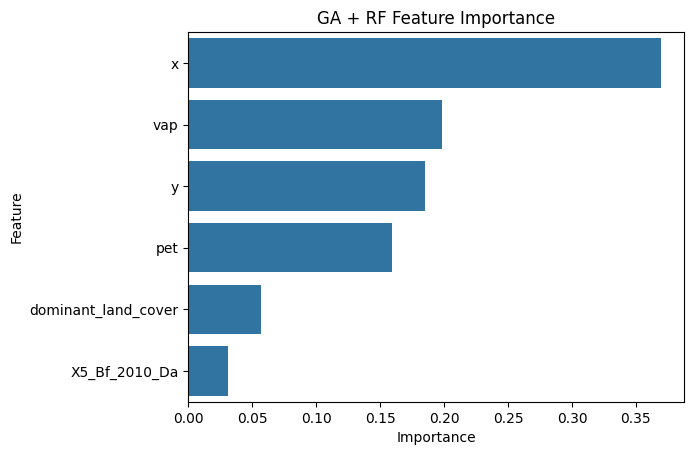

In [36]:
# FEATURE IMPORTANCE (RF)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res[selected_features], y_train_res)

importance_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

print("\nFeature Importance Scores:")
print(importance_df)

sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("GA + RF Feature Importance")
plt.show()


# Train the model

In [37]:
# MODEL TRAINING & EVALUATION
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_res[selected_features], y_train_res)
    y_pred = model.predict(X_test[selected_features])

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

results_df = pd.DataFrame(
    results, columns=["Model","Accuracy","Precision","Recall","F1"]
)

print("\nModel Performance:")
print(results_df.sort_values("Accuracy", ascending=False))



Model Performance:
                 Model  Accuracy  Precision    Recall        F1
4        Decision Tree  0.973392   0.847731  0.953871  0.897674
5        Random Forest  0.972183   0.843338  0.948929  0.893023
2                  KNN  0.942753   0.694813  0.948929  0.802228
6    Gradient Boosting  0.940939   0.683841  0.962109  0.799452
3                  SVM  0.902641   0.559961  0.953871  0.705667
1          Naive Bayes  0.888934   0.526616  0.912685  0.667872
0  Logistic Regression  0.851643   0.449012  0.935750  0.606838


# Confusion Matrix

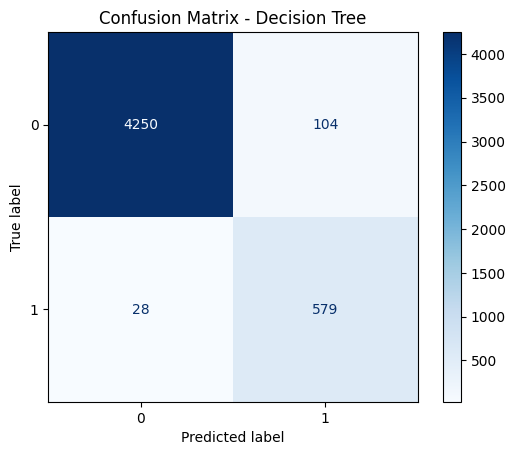

In [39]:
# Train best model
best_model = DecisionTreeClassifier(random_state=42)
best_model.fit(X_train_res[selected_features], y_train_res)

# Predict
y_best = best_model.predict(X_test[selected_features])

# Confusion Matrix
cm = confusion_matrix(y_test, y_best)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


# ROC CURVE METHOD

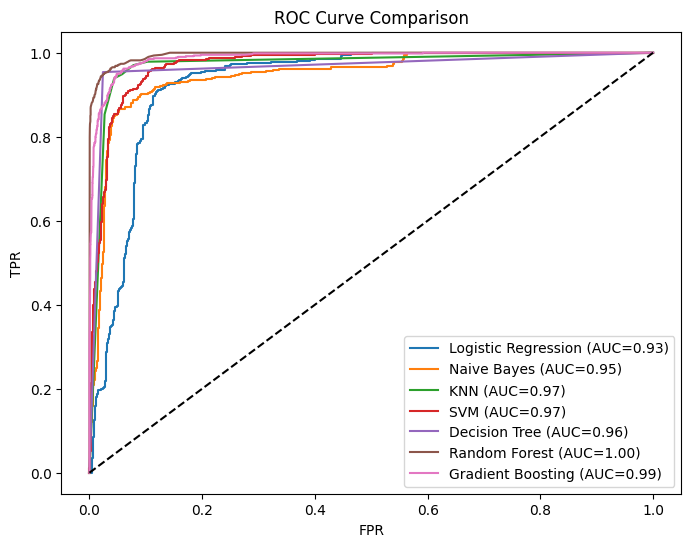

In [40]:

# ROC CURVE (ALL MODELS)

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train_res[selected_features], y_train_res)
    probs = model.predict_proba(X_test[selected_features])[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Shap method(XAI)

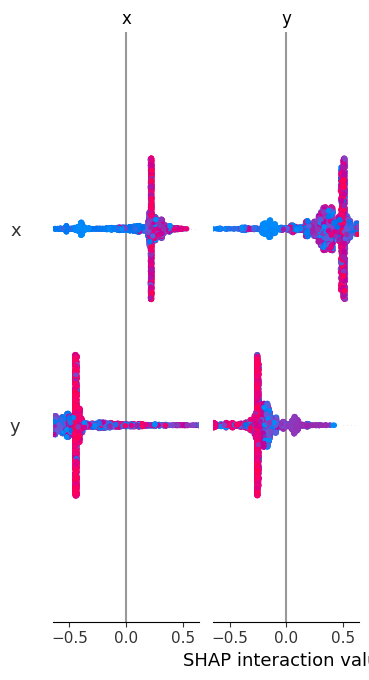

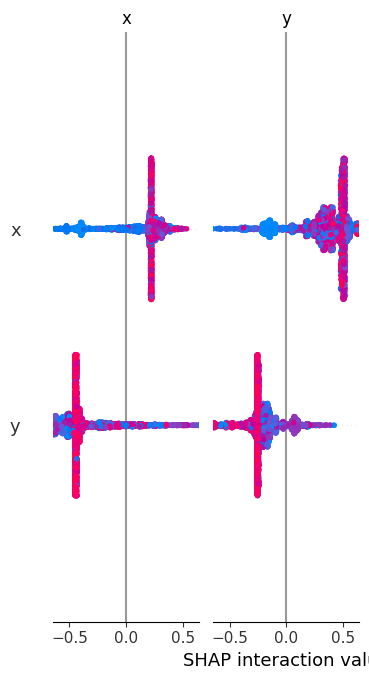

In [43]:
import shap

# Ensure X_shap matches columns used for training
X_shap = X_test[selected_features]

# Create explainer
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_shap)

# Robust check for binary or multi-class
if isinstance(shap_values, list):  # multi-class
    # Use class 1 (positive class) for binary
    shap_vals_to_plot = shap_values[1]
else:
    # shap_values is already an array (binary)
    shap_vals_to_plot = shap_values

# Summary plots
shap.summary_plot(shap_vals_to_plot, X_shap)
shap.summary_plot(shap_vals_to_plot, X_shap, plot_type="bar")


# Without fs method and train the model

In [44]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# To store results
results = []

# Loop through each model
for name, model in models.items():
    model.fit(X_train_base,y_train_base)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    results.append([name, acc, prec, rec, f1])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
# Display results sorted by Accuracy
print("\n📊 Model Performance (Without Feature Selection):")
print(results_df.sort_values(by="Accuracy", ascending=False))


📊 Model Performance (Without Feature Selection):
                 Model  Accuracy  Precision    Recall  F1 Score
5        Random Forest  0.961701   0.788382  0.939044  0.857143
4        Decision Tree  0.958476   0.778086  0.924217  0.844880
6    Gradient Boosting  0.939528   0.678281  0.962109  0.795640
2                  KNN  0.938117   0.672811  0.962109  0.791864
3                  SVM  0.918363   0.604990  0.958814  0.741874
0  Logistic Regression  0.897400   0.548515  0.912685  0.685220
1          Naive Bayes  0.894981   0.543173  0.891269  0.674984
